In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

import os
import sys
stderr = sys.stderr
sys.stderr = open(os.devnull, 'w')
import keras
sys.stderr = stderr
    
import tensorflow as tf


from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger

import argparse
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
import keras.metrics
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.metrics import auc
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import l2




import numpy, scipy.io
import torch
import torchvision.models as models
from keras import models
from keras import layers
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.applications.resnet import ResNet50
from keras.models import Model
import keras

In [3]:
from keras.applications.imagenet_utils import preprocess_input
trainRESNET = ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)
testRESNET = ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)
validationRESNET = ImageDataGenerator(dtype='float32',preprocessing_function=preprocess_input)

In [9]:
IMAGE_SIZE_RESNET = (150, 150)
NUM_EPOCHS_RESNET = 50
BATCH_SIZE_RESNET = 32
LEARNING_RATE_RESNET = 0.001
DROP_OUT_RESNET = 0.3

train_dataset_RESNET = trainRESNET.flow_from_directory('dataset/Train/',
                                         target_size = IMAGE_SIZE_RESNET,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_RESNET,
                                         class_mode = 'categorical',
                                         shuffle=False)

test_dataset_RESNET = trainRESNET.flow_from_directory('dataset/Test/',
                                         target_size = IMAGE_SIZE_RESNET,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_RESNET,
                                         class_mode = 'categorical',
                                         shuffle=False)

validation_dataset_RESNET = trainRESNET.flow_from_directory('dataset/Validation/',
                                         target_size = IMAGE_SIZE_RESNET,
                                         color_mode='rgb',
                                         batch_size = BATCH_SIZE_RESNET,
                                         class_mode = 'categorical',
                                         shuffle=False)

Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


In [10]:
validation_dataset_RESNET.class_indices

{'covid': 0, 'normal': 1, 'pneumonia': 2, 'tuberculosis': 3}

In [11]:
STEP_SIZE_TRAIN_RESNET=len(train_dataset_RESNET)
STEP_SIZE_VALID_RESNET=len(validation_dataset_RESNET)

In [12]:
conv_base_RESNET = ResNet50(include_top=False, input_shape=(150,150,3), pooling='avg',classes=4, weights='imagenet')
for layer in conv_base_RESNET.layers:layer.trainable=False

model_RESNET = models.Sequential()
model_RESNET.add(conv_base_RESNET)
model_RESNET.add(layers.Flatten())
model_RESNET.add(layers.Dense(128, activation='relu'))
model_RESNET.add(Dropout(DROP_OUT_RESNET))
model_RESNET.add(layers.Dense(4, activation='softmax'))
model_RESNET.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=LEARNING_RATE_RESNET), metrics=['acc'])
model_RESNET.save('RIoTResnet50.model')

INFO:tensorflow:Assets written to: RIoTResnet50.model\assets


C:\Users\Hp\AppData\Roaming\Python\Python36\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [13]:
# Define early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [14]:
print(model_RESNET.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 23,850,500
Trainable params: 262,788
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [15]:
from keras.callbacks import CSVLogger
csv_RESNET50 = CSVLogger('trainingRESNET50.log', separator=',', append=False)

history_RESNET=model_RESNET.fit(train_dataset_RESNET,
 steps_per_epoch =STEP_SIZE_TRAIN_RESNET,
 validation_data = validation_dataset_RESNET,
 validation_steps = STEP_SIZE_VALID_RESNET,
 epochs= NUM_EPOCHS_RESNET,
 callbacks=[early_stop]
 )

Epoch 1/50
100/100 [==============================] - 320s 3s/step - loss: 1.5996 - acc: 0.6037 - val_loss: 1.0444 - val_acc: 0.5775
Epoch 2/50
100/100 [==============================] - 312s 3s/step - loss: 0.6373 - acc: 0.7534 - val_loss: 0.2787 - val_acc: 0.9100
Epoch 3/50
100/100 [==============================] - 311s 3s/step - loss: 0.4473 - acc: 0.8163 - val_loss: 0.3664 - val_acc: 0.8406
Epoch 4/50
100/100 [==============================] - 308s 3s/step - loss: 0.3849 - acc: 0.8656 - val_loss: 0.3564 - val_acc: 0.8600
Epoch 5/50
100/100 [==============================] - 307s 3s/step - loss: 0.3216 - acc: 0.8775 - val_loss: 0.1916 - val_acc: 0.9219
Epoch 6/50
100/100 [==============================] - 309s 3s/step - loss: 0.2783 - acc: 0.9019 - val_loss: 0.1972 - val_acc: 0.9219
Epoch 7/50
100/100 [==============================] - 307s 3s/step - loss: 0.2390 - acc: 0.9103 - val_loss: 0.1542 - val_acc: 0.9450
Epoch 8/50
100/100 [==============================] - 307s 3s/step - 

In [16]:
model_RESNET.evaluate(test_dataset_RESNET)

25/25 [==============================] - 34s 1s/step - loss: 0.4327 - acc: 0.9400


[0.43265998363494873, 0.9399999976158142]

In [17]:
predictions_RESNET = model_RESNET.predict(x=test_dataset_RESNET, verbose=0)

In [18]:
rounded_predictions_RESNET = np.argmax(predictions_RESNET, axis=-1)

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [20]:
cm_RESNET = confusion_matrix(y_true=test_dataset_RESNET.classes, y_pred=rounded_predictions_RESNET)

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[165  25   2   8]
 [  1 196   0   3]
 [  3   1 194   2]
 [  1   1   1 197]]


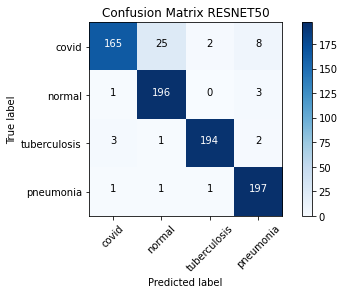

In [22]:
cm_plot_labels = ['covid', 'normal','tuberculosis', 'pneumonia']
plot_confusion_matrix(cm=cm_RESNET, classes=cm_plot_labels, title='Confusion Matrix RESNET50')

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [24]:
labels = ['covid', 'normal','tuberculosis', 'pneumonia']
report_RESNET = classification_report(test_dataset_RESNET.classes, rounded_predictions_RESNET, target_names=labels)
print(report_RESNET)

              precision    recall  f1-score   support

       covid       0.97      0.82      0.89       200
      normal       0.88      0.98      0.93       200
tuberculosis       0.98      0.97      0.98       200
   pneumonia       0.94      0.98      0.96       200

    accuracy                           0.94       800
   macro avg       0.94      0.94      0.94       800
weighted avg       0.94      0.94      0.94       800



In [25]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='orange', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    
    plt.show()

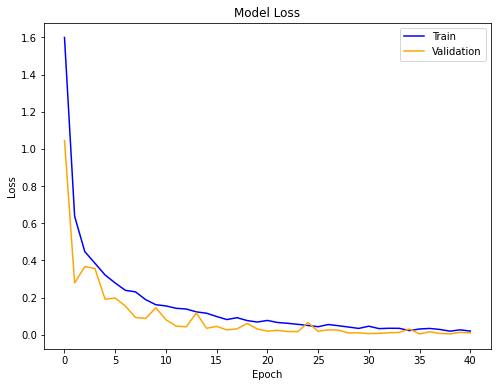

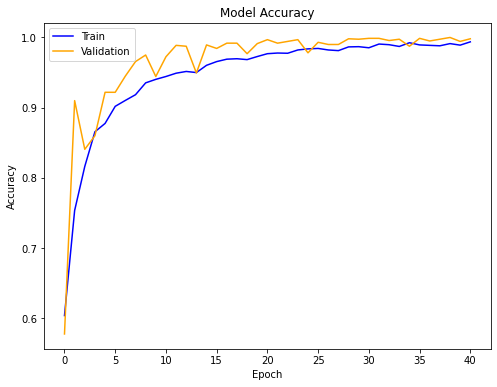

In [26]:
plot_loss_acc(history_RESNET)